<a href="https://colab.research.google.com/github/abdulwahab94/abdulwahab94.github.io/blob/main/SHAP_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [3]:
dataset=fetch_california_housing(as_frame=True)
dataset.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
x=dataset['data']
y=dataset['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=xgb.XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [5]:
# lets explain the prediction with shap values
explainer=shap.Explainer(model)
shap_values=explainer(x_test)

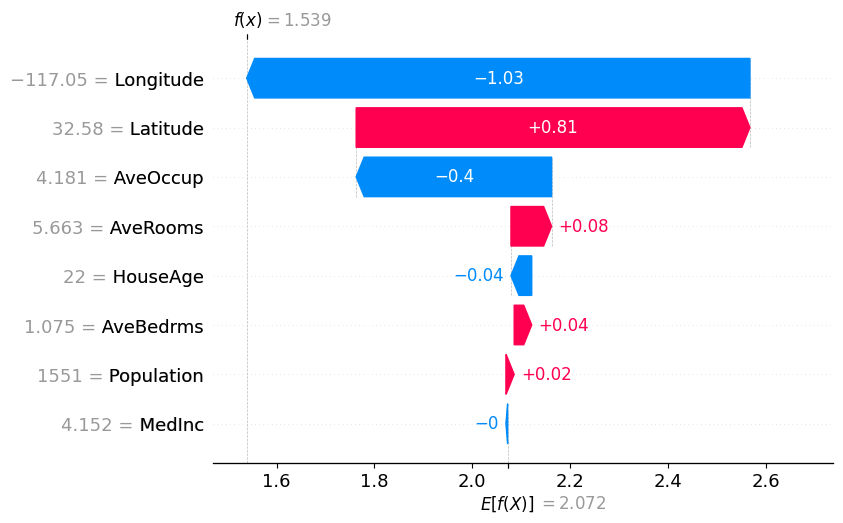

In [6]:
shap.plots.waterfall(shap_values[0])

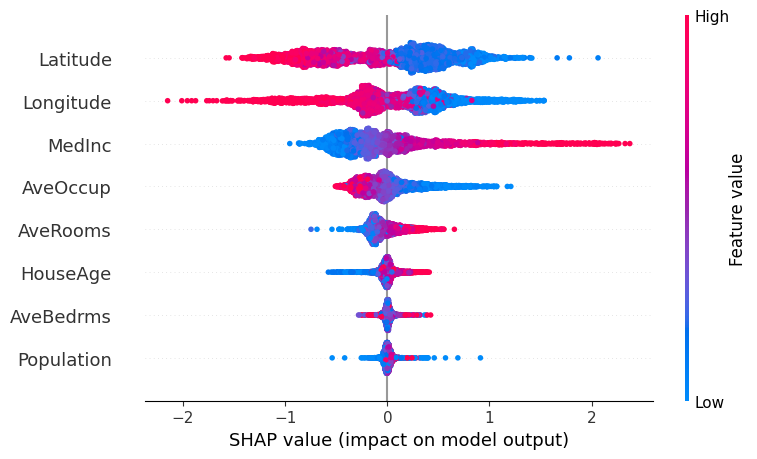

In [7]:
shap.summary_plot(shap_values,x_test)

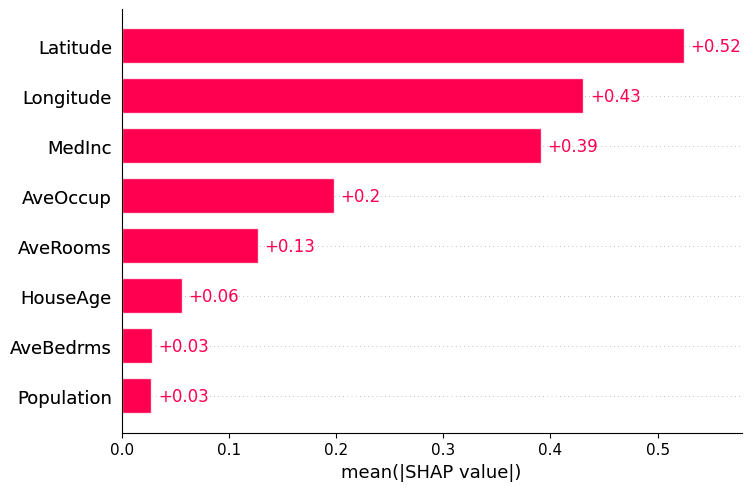

In [8]:
#with the help of bar plot, we can visualize the overall impact of all the features on the prediction of the model. This graphs basically takes median of all the individual impact
#of each feature and presents them in the form of bar plot. e.g. Latitude is overall increasing the target variable which is price of the house by 0.52 which makes sense because
#location is main parameter in the house pricing. This way one can validate the authencity of the prediction model.
shap.plots.bar(shap_values)

In [9]:
#we can draw a force plot to represent shap values for more instances. In the following, shap values of first 100 instances are plotted to get the general picture.
shap.initjs()
shap.plots.force(shap_values[0:100])

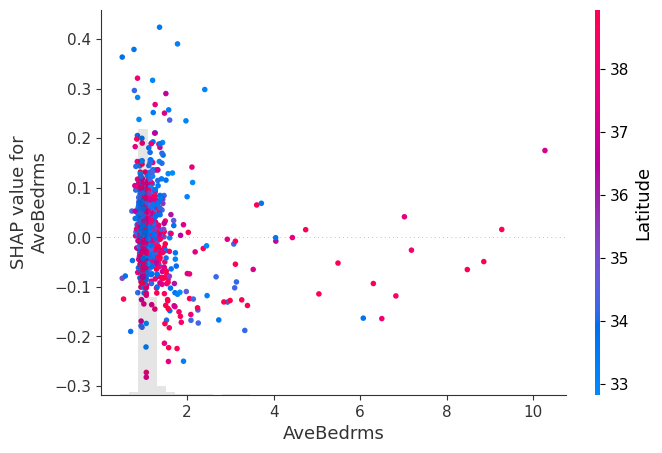

In [22]:
#we can plot the effect of individual feature like latitude or longitude etc. on the prediction. lets visualize how number of bedrooms and latitude are changing the prediction of the model.
shap.plots.scatter(shap_values[:, 'AveBedrms'], color=shap_values[:, 'Latitude'])